# **Setup Library and Dataset**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customertravel.csv')

# Quick Look

In [3]:
df.shape

(954, 7)

In [4]:
df.head(3)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [6]:
temp_df = df.dtypes.value_counts().reset_index()
temp_df

,index,0
0,object,4
1,int64,3


In [7]:
# rename churn column for clarity
df.rename(columns={'Target':'Churn'}, inplace=True)

##Dictonary Churn
dictChrn = {
    1:'Yes',
    0:'No'}

In [8]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [30]:
#Penambahan Data Dictonary Bulan ke dalam column
df['Chrn_'] = df['Churn'].map(dictChrn)

df.drop(['Churn'], axis=1, inplace=True)

Text(0, 0.5, 'numbwe of features')

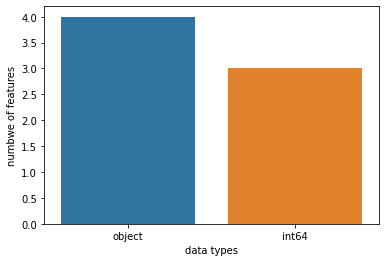

In [31]:
sns.barplot(x=temp_df['index'],y=temp_df[0])
plt.xlabel('data types')
plt.ylabel('numbwe of features')

# Data Preprocessing

**Missing Value**

In [32]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Chrn_                         0
dtype: int64

**Check duplicate value**

In [33]:
df.duplicated().sum()

0

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.duplicated().sum()

0

In [36]:
df = df.reset_index(drop=True)

In [37]:
df.shape[0]

447

In [21]:
df.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [22]:
df['Churn'].unique()

array([0, 1])

# Descriptive Analysis

In [23]:
df.describe()

,Age,ServicesOpted,Churn
count,447.000000,447.000000,447.000000
mean,32.225951,2.782998,0.272931
std,3.464807,1.641632,0.445965
min,27.000000,1.000000,0.000000
25%,29.000000,1.000000,0.000000
50%,31.000000,3.000000,0.000000
75%,35.000000,4.000000,1.000000
max,38.000000,6.000000,1.000000


In [38]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
FrequentFlyer,447,3,No,250
AnnualIncomeClass,447,3,Low Income,205
AccountSyncedToSocialMedia,447,2,No,261
BookedHotelOrNot,447,2,No,258
Chrn_,447,2,No,325


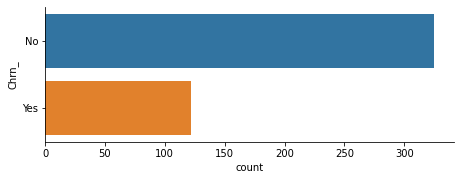

In [39]:
sns.catplot(y="Chrn_", kind="count", data=df, height=2.6, aspect=2.5)
plt.show()

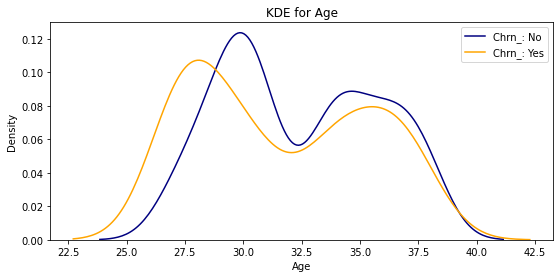

In [40]:
plt.figure(figsize=(9,4))
plt.title('KDE for Age')
sns.kdeplot(df[df['Chrn_'] == 'No']['Age'].dropna(), color= 'navy', label= 'Chrn_: No')
sns.kdeplot(df[df['Chrn_'] == 'Yes']['Age'].dropna(), color= 'orange', label= 'Chrn_: Yes')
plt.legend()
plt.show()

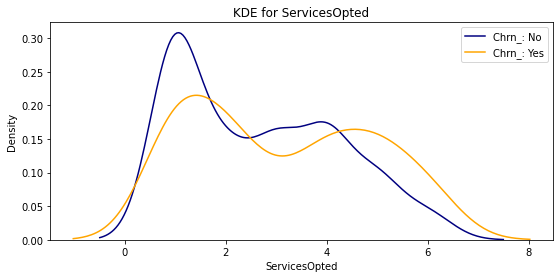

In [41]:
plt.figure(figsize=(9,4))
plt.title('KDE for ServicesOpted')
sns.kdeplot(df[df['Chrn_'] == 'No']['ServicesOpted'].dropna(), color= 'navy', label= 'Chrn_: No')
sns.kdeplot(df[df['Chrn_'] == 'Yes']['ServicesOpted'].dropna(), color= 'orange', label= 'Chrn_: Yes')
plt.legend()
plt.show()

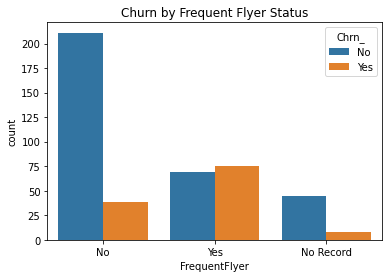

In [42]:
sns.countplot(data=df, x='FrequentFlyer', hue='Chrn_').set_title('Churn by Frequent Flyer Status');

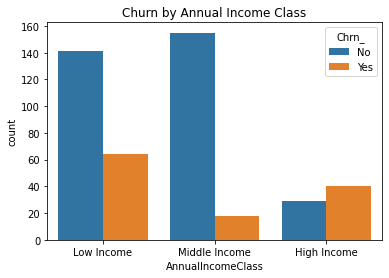

In [43]:
sns.countplot(data=df, x='AnnualIncomeClass', order=['Low Income','Middle Income','High Income'], hue='Chrn_').set_title('Churn by Annual Income Class');

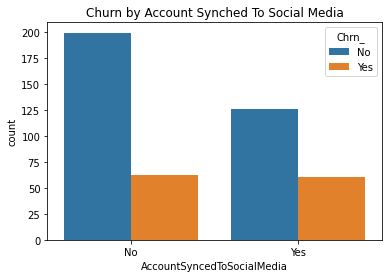

In [44]:
sns.countplot(data=df, x='AccountSyncedToSocialMedia', hue='Chrn_').set_title('Churn by Account Synched To Social Media');

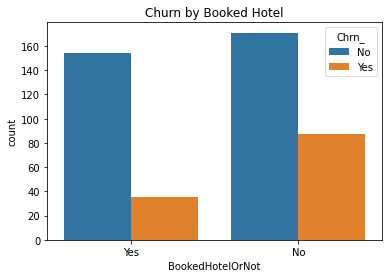

In [45]:
sns.countplot(data=df, x='BookedHotelOrNot', hue='Chrn_').set_title('Churn by Booked Hotel'); 

# Quick Classification

In [46]:
X = df.drop(['Chrn_'],1)
y = df['Chrn_']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [47]:
y.value_counts(normalize=True)

No     0.727069
Yes    0.272931
Name: Chrn_, dtype: float64

In [48]:
X_dummy = pd.get_dummies(X)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y)

In [50]:
X_train.shape

(335, 12)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
rfc.score(X_test,y_test)

0.7857142857142857

## **Conclusion**
We can conclude the EDA and model.

**EDA**

Recent users are more likely churn.
Client with higher monthly charges and lower total charges are more likely churn.
Model

Random Forest have accuracy about 78.5% which is greater than the treshold. So the model has the better result.